Dữ liệu mẫu: X (min=0.0, max=100.0)
Đang training với RMSprop...


C:\Users\Admin\PycharmProjects\PythonProject1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



result
Công thức gốc:      y = 0.5x + 2.0
Model dự đoán:      y = 0.5315x + 1.7955


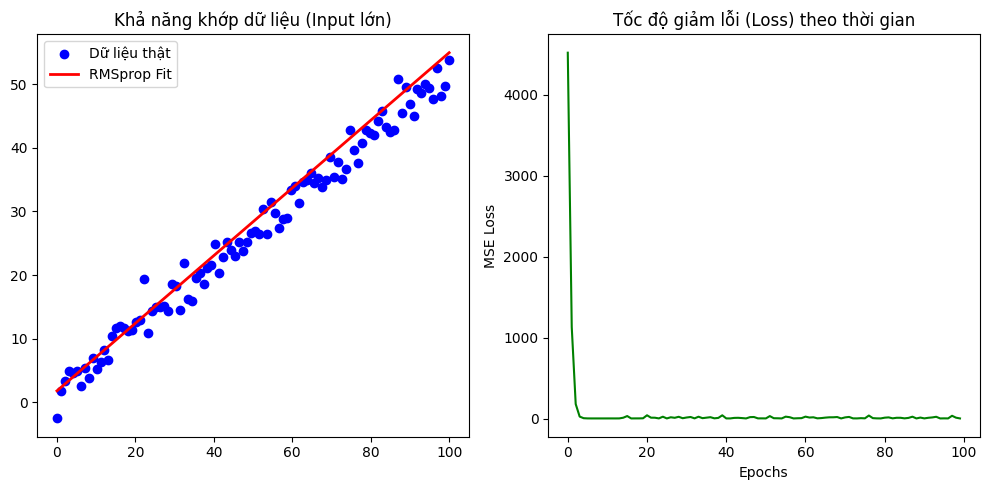

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#tạo một array bắt đầu từ số 0, kết thúc bằng số 100 và đảm bảo độ dài là 100.
X = np.linspace(0, 100, 100)
true_w = 0.5
true_b = 2.0
# Công thức: y = 0.5x + 2 + nhiễu
y = (true_w * X + true_b) + np.random.normal(0, 2, 100)

#tạo nhiễu do dữ liệu thực tế không bao giờ thẳng tắp, sử dụng np.random.normal
#loc: giá trị trung bình là 0
#scale: độ lệch chuẩn là 1.0
#size: kích thước mảng đầu ra, chọn 100 để khớp với X

print(f"Dữ liệu mẫu: X (min={X.min()}, max={X.max()})")

# Đây chính là Linear Regression (y=ax+b) dưới dạng Neural Network, nhưng chỉ dùng 1 lớp và 1 neuron duy nhất
# input_shape=[1] là 1 biến đầu vào (x), do ta đưa vào 1 con số x.
# units=1 là 1 biến đầu ra (y) (1 neuron)
# bình thường có thêm activation(relu,sigmoid,softmax) nhưng mình để là none để giữ nguyên quan hệ tuyến tính
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

#khai báo optimizer để tí nữa dùng
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.1,  # Tốc độ học khá cao(bình thường để 0.001)
    rho=0.9,            # Hệ số suy giảm (Decay rate)(chỉ nhớ 90% dữ liệu quá khứ)
    epsilon=1e-07       # Số nhỏ để tránh chia cho 0(epsilon để tránh chia hết cho 0 như trong công thức)
)
#nếu muốn minh hoạ cho RMSprop kèm momentum thì có thể thêm tham số momentum vào nhé (0.9)


model.compile(optimizer=optimizer, loss='mean_squared_error')


print("Đang training với RMSprop...")
history = model.fit(X, y, epochs=100, verbose=0)

weights = model.layers[0].get_weights()
w_pred = weights[0][0][0]
b_pred = weights[1][0]

print("\nresult")
print(f"Công thức gốc:      y = {true_w}x + {true_b}")
print(f"Model dự đoán:      y = {w_pred:.4f}x + {b_pred:.4f}")


#vẽ biểu đồ
plt.figure(figsize=(10, 5))

# Biểu đồ 1: Đường hồi quy
plt.subplot(1, 2, 1) #chia thành 1 hàng, 2 cột và vẽ vào ô số 1
plt.scatter(X, y, label='Dữ liệu thật', color='blue') #vẽ kiểu phân tán (có chấm)
plt.plot(X, w_pred * X + b_pred, color='red', label='RMSprop Fit', linewidth=2) #vẽ kiểu liền mạch
plt.title("Khả năng khớp dữ liệu (Input lớn)")
plt.legend() #hiển thị legend

# Biểu đồ 2: Tốc độ hội tụ (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='green')
plt.title("Tốc độ giảm lỗi (Loss) theo thời gian")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")

plt.tight_layout()
plt.show()


Đoạn Loss ở bên phải có phần dao động một chút nhưng đây là do mình sử dụng learning rate cao.